# ANALYSIS OF FX VANILLA OPTIONS

In this notebook I show how you can analyse Vanilla European Call and Put FX options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.fx import *
from financepy.market.volatility import *
from financepy.market.curves import *

# Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

In [3]:
value_dt = Date(10, 4, 2020)

In [4]:
for_name = "EUR"
dom_name = "USD"
for_cc_rate = 0.03460  # EUR
dom_cc_rate = 0.02940  # USD

In [5]:
domestic_curve = DiscountCurveFlat(value_dt, dom_cc_rate)
foreign_curve = DiscountCurveFlat(value_dt, for_cc_rate)

In [6]:
currency_pair = for_name + dom_name
spot_fx_rate = 1.3465

In [7]:
expiry_dt = value_dt.add_tenor("1Y")

In [8]:
strike_price = 1.362024

We now create the option object

In [9]:
call_option = FXVanillaOption(expiry_dt, strike_price, currency_pair, OptionTypes.EUROPEAN_CALL, 1.0, "EUR")

In [10]:
print(call_option)

OBJECT TYPE: FXVanillaOption
EXPIRY DATE: 10-APR-2021
CURRENCY PAIR: EURUSD
PREMIUM CCY: EUR
STRIKE FX RATE: 1.362024
OPTION TYPE: OptionTypes.EUROPEAN_CALL
SPOT DAYS: 0
NOTIONAL: 1.0


## Valuation Dependency on Spot FX Rate

To do a valuation we need to specify the date and set the market inputs

In [11]:
spot_fx_rate = np.linspace(0.1,3.0,50)

For simplicity the discount curve is assumed to be flat here (we can pass in any discount curve) and is created as follows.

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [12]:
volatility = 0.20
model = BlackScholes(volatility)

The valuation is as follows and the output is in a dictionary

In [13]:
call_value = call_option.value(value_dt, spot_fx_rate, domestic_curve, foreign_curve, model)

In [14]:
labels = ['v', 'cash_dom', 'cash_for', 'pips_dom', 'pips_for', 'pct_dom', 'pct_for']

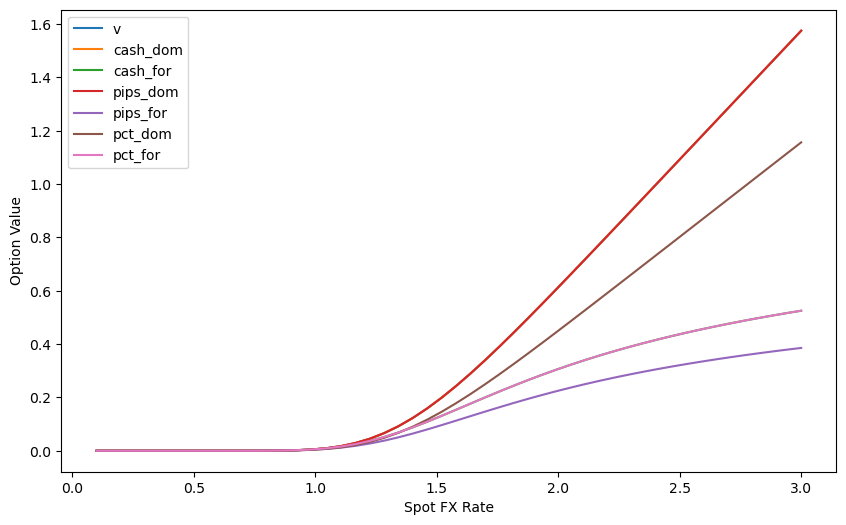

In [15]:
plt.figure(figsize=(10,6))

for labelName in labels:
    plt.plot(spot_fx_rate, call_value[labelName], label=labelName)

plt.xlabel("Spot FX Rate")
plt.ylabel("Option Value")
plt.legend();

## Delta Dependency on Spot FX Rate

In [16]:
deltaValue = call_option.delta(value_dt, spot_fx_rate, domestic_curve, foreign_curve, model)

In [17]:
labels = ['pips_spot_delta', 'pips_fwd_delta', 'pct_spot_delta_prem_adj', 'pct_fwd_delta_prem_adj']

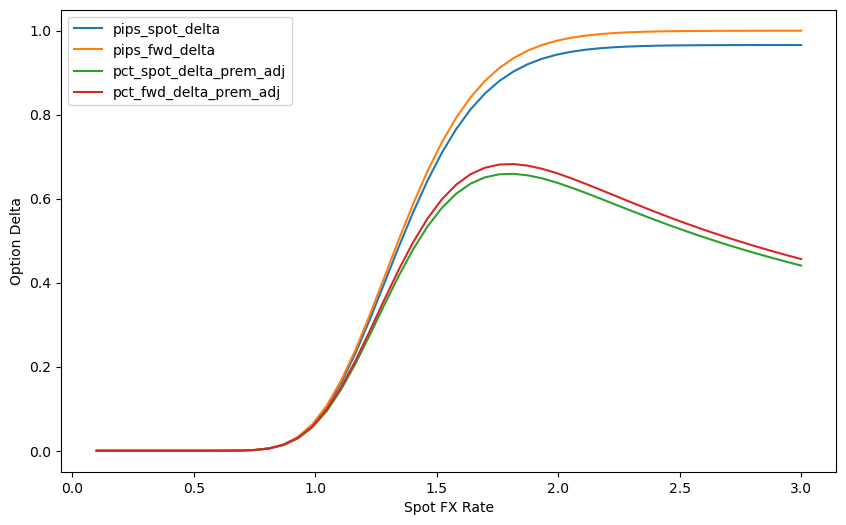

In [18]:
plt.figure(figsize=(10,6))

for labelName in labels:
    plt.plot(spot_fx_rate, deltaValue[labelName], label=labelName)

plt.xlabel("Spot FX Rate")
plt.ylabel("Option Delta")
plt.legend();

Note that the premium adjusted delta is not monotonic in the spot FX rate.

## Volatility Dependency

We can see how the value depends on volatility

In [19]:
spot_fx_rate = 1.3465

In [20]:
volatilities = np.linspace(0.01,10,100)
models = BlackScholes(volatilities)
values = call_option.value(value_dt, spot_fx_rate, domestic_curve, foreign_curve, models)

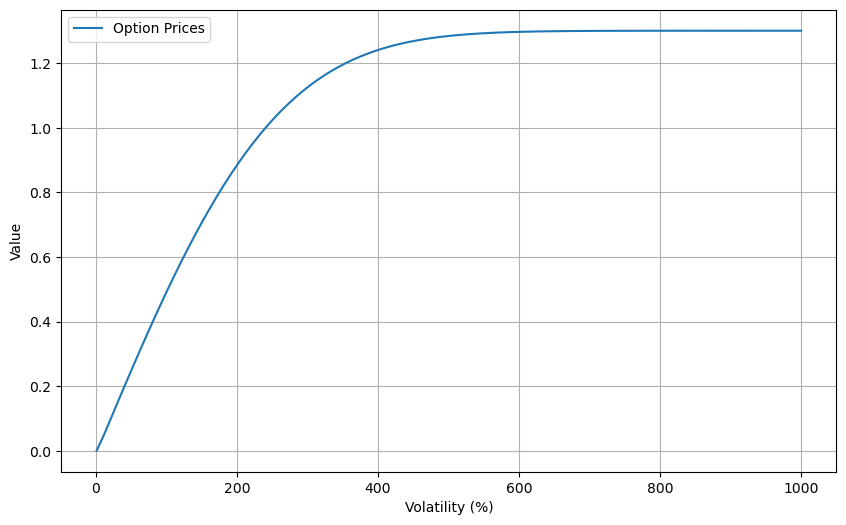

In [21]:
plt.figure(figsize=(10,6))
plt.plot(volatilities*100,values['v'], label="Option Prices")
plt.xlabel("Volatility (%)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Strike Price Dependency

We examine the strike dependency

In [22]:
strike_prices = np.linspace(0.5,3,50)

But as these are part of the option description - so we need to first vectorise those.

In [23]:
call_options = FXVanillaOption(expiry_dt, strike_prices, currency_pair, OptionTypes.EUROPEAN_CALL, 1.0, "EUR")

Look, we have an array of call_options with different strikes

Then we can get back a vector of values

In [24]:
call_values = call_options.value(value_dt, spot_fx_rate, domestic_curve, foreign_curve, model)

In [25]:
labels = ['v', 'cash_dom', 'cash_for', 'pips_dom', 'pips_for', 'pct_dom', 'pct_for']

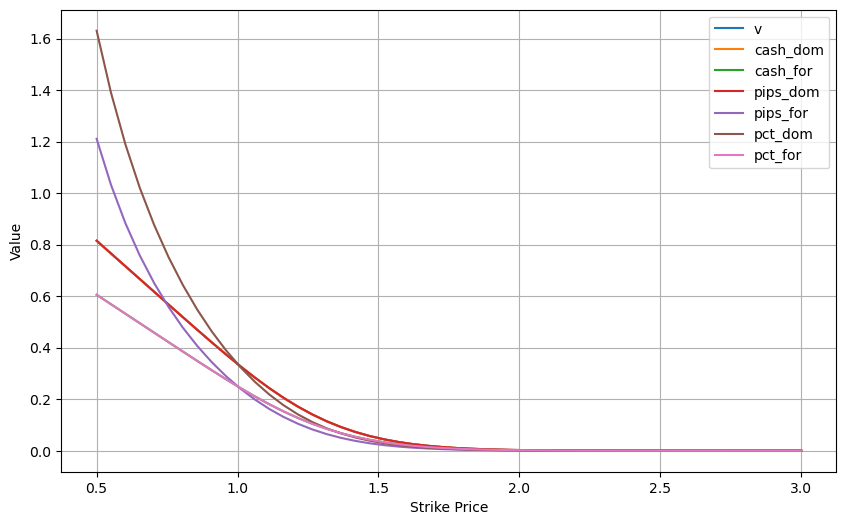

In [26]:
plt.figure(figsize=(10,6))

for labelName in labels:
    plt.plot(strike_prices, call_values[labelName], label=labelName)

plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [27]:
strike_prices = np.linspace(0.01,3,50)

In [28]:
call_options = FXVanillaOption(expiry_dt, strike_prices, currency_pair, OptionTypes.EUROPEAN_CALL, 1.0, "EUR")

In [29]:
deltaValues = call_options.delta(value_dt, spot_fx_rate, domestic_curve, foreign_curve, model)

In [30]:
labels = ['pips_spot_delta', 'pips_fwd_delta', 'pct_spot_delta_prem_adj', 'pct_fwd_delta_prem_adj']

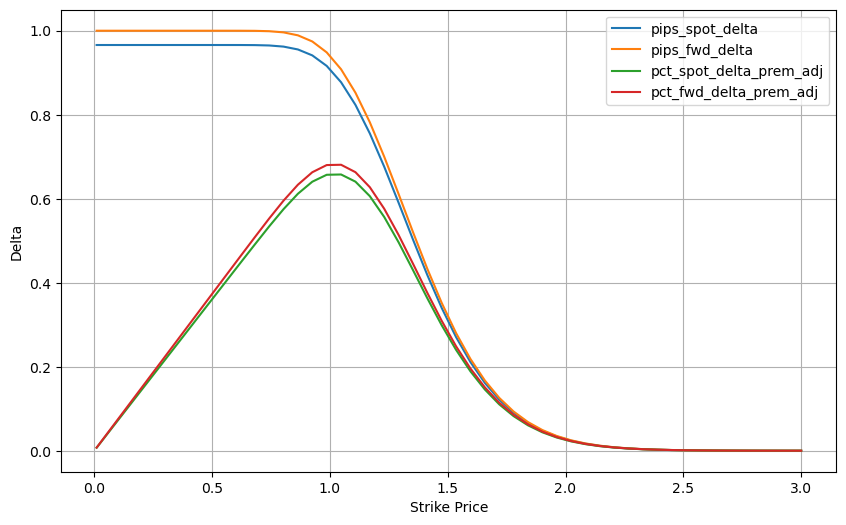

In [31]:
plt.figure(figsize=(10,6))

for labelName in labels:
    plt.plot(strike_prices, deltaValues[labelName], label=labelName)

plt.xlabel("Strike Price")
plt.ylabel("Delta")
plt.legend()
plt.grid()

We see that the delta is not a monotonic function of the strike price.

Copyright (c) 2020, Dominic O'Kane 